<a href="https://colab.research.google.com/github/enriquejujuy/IPDI2025-Choque-Espinoza/blob/main/TP1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TRABAJO PRACTICO N° 1**
### Choque, Enrique - Espinoza, Daniel



Funcion para transformar del espacio RGB a YIQ

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
# Para manipular imagenes nampy, para ver imagenes imageio, para mostrar las imagenes matplotlib as plt
# Funcion para pasar de RGB a YIQ
def RGB2YIQ(img):
  """
  Args:
    img:
  """
  yiq=np.zeros(img.shape)
  yiq[:,:,0] = np.clip(0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2],0,1)
  yiq[:,:,1] = np.clip(0.59*img[:,:,0] + -0.27 * img[:,:,1]  +-0.32*img[:,:,2],-0.5957,0.5957)
  yiq[:,:,2] = np.clip(0.21*img[:,:,0] + -0.52 * img[:,:,1]  + 0.31*img[:,:,2],0.-5226,0.5226)
  return yiq


Funcion para transformar del espacio  YIQ a RGB

In [2]:
# Funcion para pasar de YIQ a RGB
def YIQ2RGB(img):
  """
  Args:
    img:
  """
  rgb=np.zeros(img.shape)
  rgb[:,:,0] = np.clip(img[:,:,0] + 0.9563*img[:,:,1] + 0.621*img[:,:,2],0,1)
  rgb[:,:,1] = np.clip(img[:,:,0] - 0.2721*img[:,:,1] - 0.6474*img[:,:,2],0,1)
  rgb[:,:,2] = np.clip(img[:,:,0] - 1.1070*img[:,:,1] + 1.7046*img[:,:,2],0,1)
  return rgb


Cargar la imagen y mostrar sus diferentes canales

(288, 282, 3)
float64


/tmp/ipython-input-1034446941.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=np.clip(imageio.imread('/content/Charly.bmp')/255,0,1)


<Figure size 640x480 with 0 Axes>

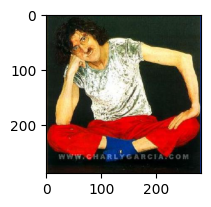

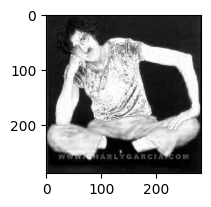

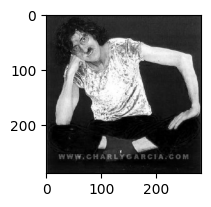

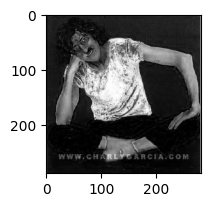

In [3]:
img=np.clip(imageio.imread('/content/Charly.bmp')/255,0,1)  # Imagen normalizada y clipeada entre 0 y 1
print(img.shape)
print(img.dtype)

plt.figure(0)
plt.figure(figsize=(2, 4))  # Ajusta el tamaño de la figura
plt.imshow(img)
plt.figure(1)
plt.figure(figsize=(2, 4))  # Ajusta el tamaño de la figura
plt.imshow(img[:,:,0],'gray',vmin=0, vmax=1)
plt.figure(2)
plt.figure(figsize=(2, 4))  # Ajusta el tamaño de la figura
plt.imshow(img[:,:,1],'gray',vmin=0, vmax=1)
plt.figure(3)
plt.figure(figsize=(2, 4))  # Ajusta el tamaño de la figura
plt.imshow(img[:,:,2],'gray',vmin=0, vmax=1)

Llamar a la funcion (pasar de RGB a YIQ) para mostrar la imagen (lo de clases) Ver de cada canal  YIQ

<Figure size 640x480 with 0 Axes>

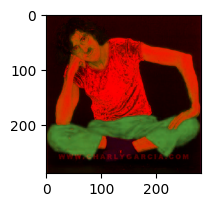

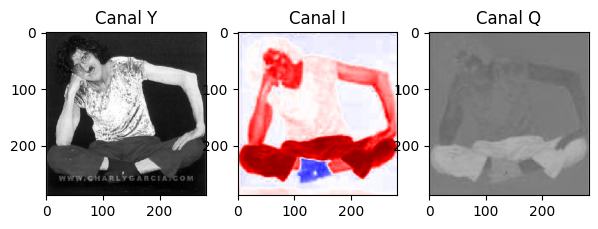

In [10]:
yiq=RGB2YIQ(img)  # La imagen se transformo al espacio YIQ (yiq)
plt.figure(0)
plt.figure(figsize=(2, 4))  # Ajusta el tamaño de la figura
plt.imshow(yiq)

fig, axs = plt.subplots(1, 3, figsize=(7, 3))
axs[0].imshow(yiq[:,:,0], cmap='gray', vmin=0, vmax=1)
axs[0].set_title('Canal Y')
axs[1].imshow(yiq[:,:,1], cmap='seismic', vmin=-0.5957, vmax=0.5957)
axs[1].set_title('Canal I')
axs[2].imshow(yiq[:,:,2], cmap='gray', vmin=-0.5226, vmax=0.5226)
axs[2].set_title('Canal Q')
plt.show()


Producto por un escalar a la luminancia (Y) y la cromaticidad en los canales I y Q

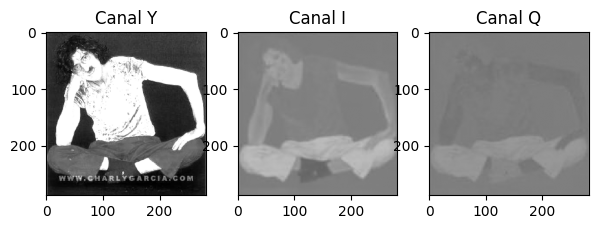

In [9]:
# Modificar la luminancia
yiq[:,:,0] = yiq[:,:,0] * 1.5  # Aumenta la luminancia en un 50%

# Modificar la cromaticidad
yiq[:,:,1] = yiq[:,:,1] * 0.5  # Reduce la cromaticidad en un 50%
yiq[:,:,2] = yiq[:,:,2] * 0.5  # Reduce la cromaticidad en un 50%

# Mostrar la imagen modificada en YIQ
fig, axs = plt.subplots(1, 3, figsize=(7, 3))
axs[0].imshow(yiq[:,:,0], cmap='gray', vmin=0, vmax=1)
axs[0].set_title('Canal Y')
axs[1].imshow(yiq[:,:,1], cmap='gray', vmin=-0.5957, vmax=0.5957)
axs[1].set_title('Canal I')
axs[2].imshow(yiq[:,:,2], cmap='gray', vmin=-0.5226, vmax=0.5226)
axs[2].set_title('Canal Q')
plt.show()


Transformar la imagen procesada (a=1.5 y b=0.5) en el espacio YIQ al RGB

<Figure size 640x480 with 0 Axes>

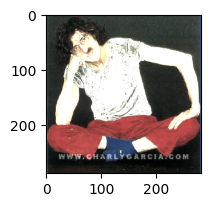

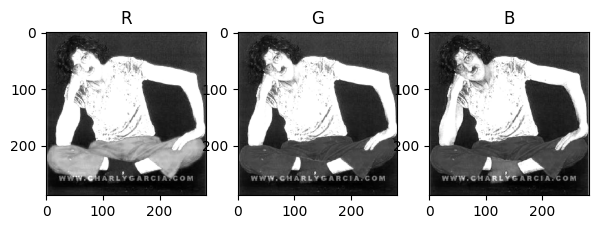

In [6]:
# Llamo a la funcion (pasar de YIQ a RGB) para mostrar la imagen (lo de clases) Ver de cada canal  RGB
rgb = YIQ2RGB(yiq)
plt.figure(0)
plt.figure(figsize=(2, 4))  # Ajusta el tamaño de la figura
plt.imshow(rgb)

fig, axs = plt.subplots(1, 3, figsize=(7, 5))
axs[0].imshow(rgb[:,:,0], cmap='gray', vmin=0, vmax=1)
axs[0].set_title('R')
axs[1].imshow(rgb[:,:,1], cmap='gray', vmin=0, vmax=1)
axs[1].set_title('G')
axs[2].imshow(rgb[:,:,2], cmap='gray', vmin=0, vmax=1)
axs[2].set_title('B')
plt.show()


Mostrar la imagen (en RGB) original y la modificada. Con a=1.5 (luminancia) y b=0.5 (cromaticidad)

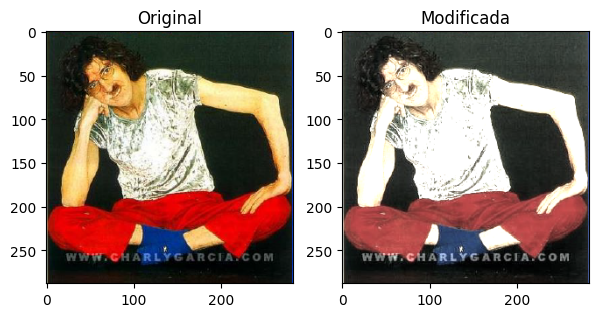

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(rgb)
axs[1].set_title('Modificada')
plt.show()
